### Data Description

         The file contains data on 5000 customers. The data include customer demographic information (age, income, etc.), the customer's relationship with the bank (mortgage, securities account, etc.), and the customer response to the last personal loan campaign (Personal Loan). Among these 5000 customers, only 480 (= 9.6%) accepted the personal loan that was offered to them in the earlier campaign. A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio with minimal budget. 
##### Objective :
         We have to build a model which will be used to predict which customer will most likely to accept the offer for personal loan, based on the specific relationship with the bank across various features given in the dataset using different classification models (Logistic, K-NN and Naïve Bayes).
##### Column description:        
        ID		           -	Customer ID							
        Age		          -	Customer's age in completed years							
        Experience	       -	#years of professional experience							
        Income		       -	Annual income of the customer ($000)							
    ZIPCode	         -	Home Address ZIP code.							
    Family		 -	Family size of the customer							
    CCAvg		 -	Avg. spending on credit cards per month ($000)							
        Education	        -	Education Level. 1: Undergrad; 2: Graduate; 3:Advanced/Professional							
        Mortgage	         -	Value of house mortgage if any. ($000)							
        Personal Loan	    -	Did this customer accept the personal loan offered in the last campaign?				
        Securities Account   -	Does the customer have a securities account with the bank?							
        CD Account           -	Does the customer have a certificate of deposit (CD) account with the bank?							    Online	               -	Does the customer use internet banking facilities?							
        CreditCard           -	Does the customer use a credit card issued by UniversalBank?		

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from scipy.stats import skew
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix,accuracy_score,recall_score,precision_score

In [2]:
df = pd.read_csv('Bank_Personal_Loan.csv')
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [3]:
# Rearranging target columns
cols = list(df.columns)
df = df[cols[0:9] + cols[10:14] + [cols[-5]]]
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,1,0,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,1,0,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,1,0,0


In [4]:
# Getting Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Securities Account  5000 non-null   int64  
 10  CD Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
 13  Personal Loan       5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [5]:
# Missing Values
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
Personal Loan         0
dtype: int64

In [6]:
# Duplicates
df.duplicated().sum()

0

In [7]:
# Statistical analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Securities Account,5000.0,0.104400,0.305809,0.0,0.00,0.0,0.00,1.0


In [8]:
# Dimentionality Reduction
warnings.filterwarnings('ignore')
df.drop(columns = ['ID','ZIP Code'],axis = 1,inplace=True)

In [9]:
df.shape

(5000, 12)

In [10]:
# Handling negative values of Experience
neg_exp = df.loc[df['Experience']<0]
print(df[df['Experience'] < 0]['Experience'].value_counts())
print('Exp_Median',df.Experience.median())
neg_exp

-1    33
-2    15
-3     4
Name: Experience, dtype: int64
Exp_Median 20.0


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
89,25,-1,113,4,2.30,3,0,0,0,0,1,0
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,1,0,0
451,28,-2,48,2,1.75,3,89,0,0,1,0,0
524,24,-1,75,4,0.20,1,0,0,0,1,0,0
536,25,-1,43,3,2.40,2,176,0,0,1,0,0
540,25,-1,109,4,2.30,3,314,0,0,1,0,0
576,25,-1,48,3,0.30,3,0,0,0,0,1,0
583,24,-1,38,2,1.70,2,0,0,0,1,0,0
597,24,-2,125,2,7.20,1,0,1,0,0,1,0


In [11]:
pos_exp = df.loc[df['Experience'] >= 0]
print('pos_exp_median',pos_exp.Experience.median())
pos_exp

pos_exp_median 20.0


,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
0,25,1,49,4,1.6,1,0,1,0,0,0,0
1,45,19,34,3,1.5,1,0,1,0,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,1,0,0
4996,30,4,15,4,0.4,1,85,0,0,1,0,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0,0


In [12]:
data = df.copy()
data.shape

(5000, 12)

In [13]:
data.Experience.replace(to_replace =[-1,-2,-3], value = 0, inplace=True)
print(data.Experience.unique())
data.Experience.describe()

[ 1 19 15  9  8 13 27 24 10 39  5 23 32 41 30 14 18 21 28 31 11 16 20 35
  6 25  7 12 26 37 17  2 36 29  3 22  0 34 38 40 33  4 42 43]


count    5000.000000
mean       20.119600
std        11.440484
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

### Visualization

In [1]:
plt.figure(figsize = (15,10))
sns.heatmap(data.corr(), annot = True)

NameError: name 'plt' is not defined

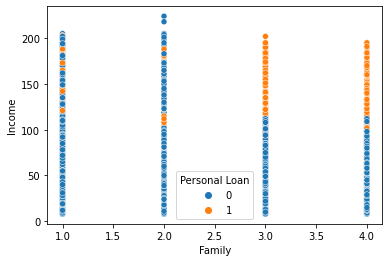

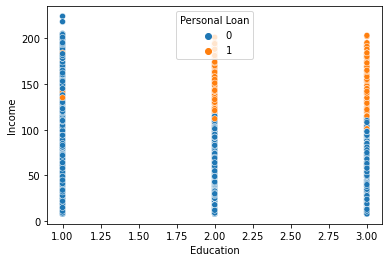

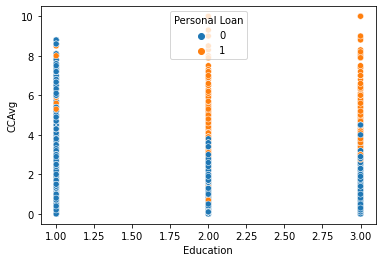

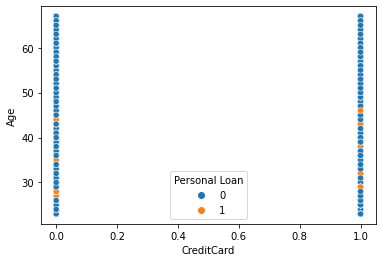

In [15]:
x = [data.Family,data.Income,data.Education,data.CCAvg,data.CreditCard,data.Age]
def scatter(a,b):
    sns.scatterplot(x = a, y = b, hue = 'Personal Loan', data = data)
scatter(x[0],x[1])
plt.show()
scatter(x[2],x[1])
plt.show()
scatter(x[2],x[3])
plt.show()
scatter(x[4],x[5])
plt.show()

Age
-0.029331878574766698


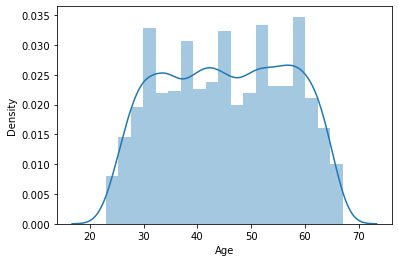

Experience
-0.017215538722506932


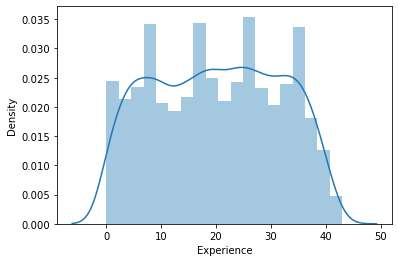

Income
0.8410861846424931


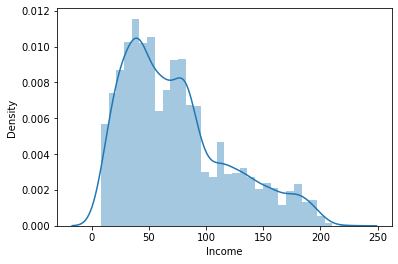

Family
0.15517409936178264


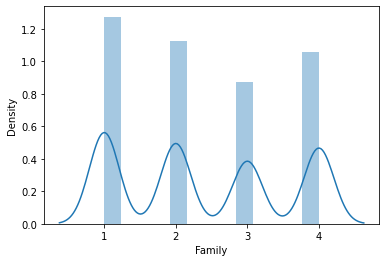

CCAvg
1.5979637637001873


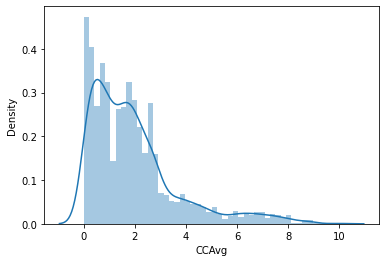

Education
0.22702518198805896


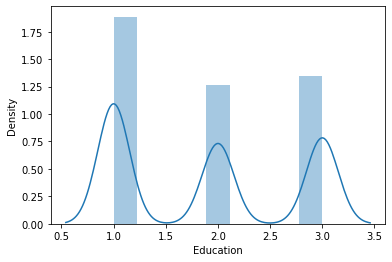

Mortgage
2.103371065804789


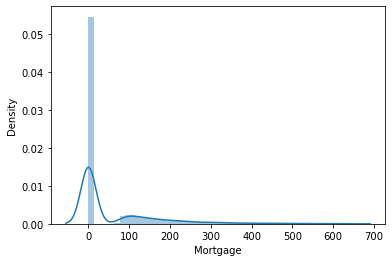

Securities Account
2.587491827731683


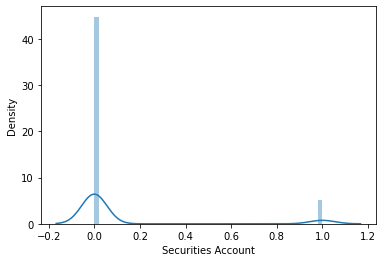

CD Account
3.6906061919698963


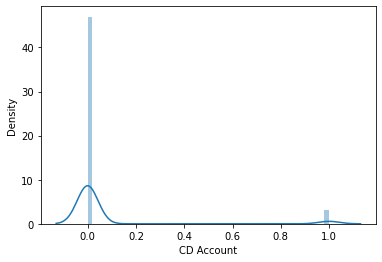

Online
-0.3946668814543566


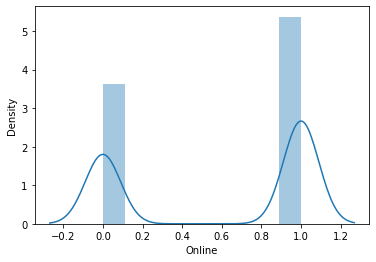

CreditCard
0.904318051969846


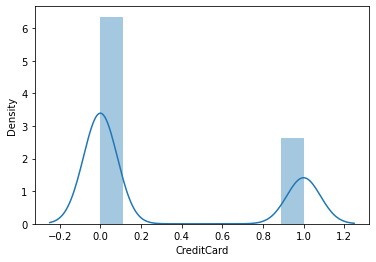

Personal Loan
2.74278350529752


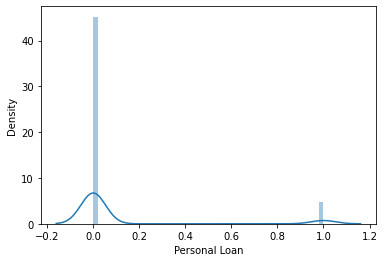

In [16]:
### Skew ###
for col in data:
    print(col)
    print(skew(data[col]))
    plt.figure()
    sns.distplot(data[col])
    plt.show()

<AxesSubplot:>

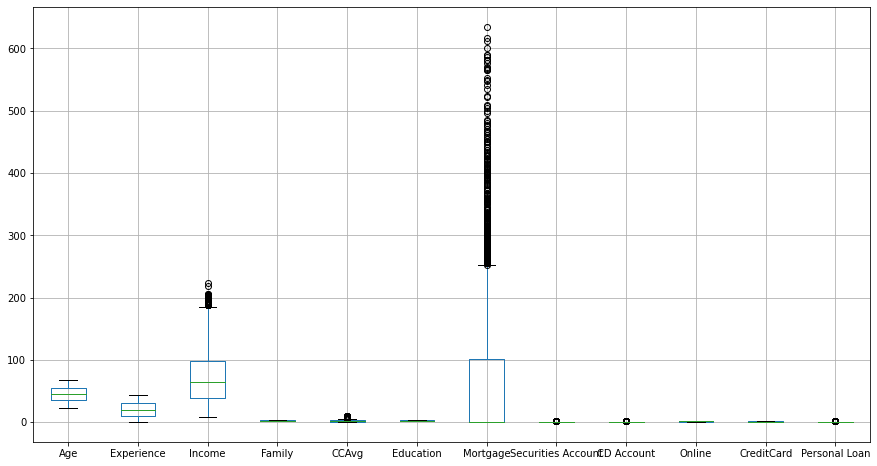

In [17]:
### Outliers ###
plt.figure(figsize=(15,8))
data.boxplot()

In [18]:
data_o = data.iloc[:,:11]
data_o.tail()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
4995,29,3,40,1,1.9,3,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,1,0
4999,28,4,83,3,0.8,1,0,0,0,1,1


In [19]:
outliers_data = stats.zscore(data_o)
outliers = outliers_data[(outliers_data>3)]
outliers.count()

Age                     0
Experience              0
Income                  2
Family                  0
CCAvg                 121
Education               0
Mortgage              105
Securities Account      0
CD Account            302
Online                  0
CreditCard              0
dtype: int64

In [20]:
### Scaling ###
scale = RobustScaler()
data['Mortgage'] = scale.fit_transform(data[['Mortgage']])
data['CCAvg'] = scale.fit_transform(data[['CCAvg']])
data['Income'] = scale.fit_transform(data[['Income']])
data.tail()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard,Personal Loan
4995,29,3,-0.406780,1,0.222222,3,0.000000,0,0,1,0,0
4996,30,4,-0.830508,4,-0.611111,1,0.841584,0,0,1,0,0
4997,63,39,-0.677966,2,-0.666667,3,0.000000,0,0,0,0,0
4998,65,40,-0.254237,3,-0.555556,2,0.000000,0,0,1,0,0
4999,28,4,0.322034,3,-0.388889,1,0.000000,0,0,1,1,0


### Preprocessing

In [21]:
data['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

([<matplotlib.patches.Wedge at 0x1d3e16564c0>,
 [Text(-1.050350983068654, 0.3267457916587637, 'Accepted'),
  Text(1.1458374193882674, -0.3564500081773545, 'Rejected')],
 [Text(-0.5729187180374475, 0.17822497726841657, '90.4%'),
  Text(0.6684051613098225, -0.20792917143679013, '9.6%')])

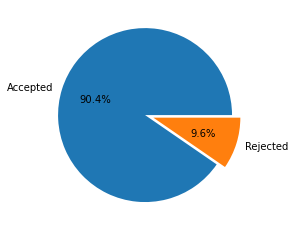

In [22]:
PL= pd.value_counts(data['Personal Loan'])
plt.pie(PL,autopct='%1.1f%%',explode=(0,0.1),labels=('Accepted','Rejected'))

In [23]:
X = data.drop(columns='Personal Loan',axis=1)
Y = data['Personal Loan']
print(X.shape,Y.shape)

(5000, 11) (5000,)


### OverSampling

In [24]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [25]:
from collections import Counter
from imblearn import over_sampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_os,Y_os = ros.fit_resample(X,Y)
print(sorted(Counter(Y_os).items()),Y_os.shape)

[(0, 4520), (1, 4520)] (9040,)


### Splitting the data

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X_os,Y_os,test_size=0.3,random_state=1)
print(X_train.shape,Y_train.shape)
print(X_test.shape, Y_test.shape)

(6328, 11) (6328,)
(2712, 11) (2712,)


## Models

### 1. Logistic Regression

Accuracy on training data :  0.8947534766118836
Confusion matrix on training data :  [[2833  329]
 [ 337 2829]]
Accuracy on test data :  0.8952802359882006


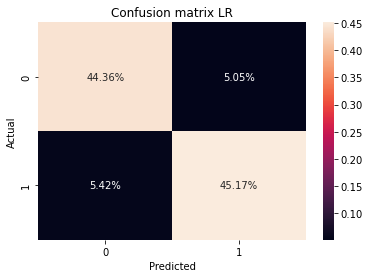

In [42]:
model = LogisticRegression()
model.fit(X_train,Y_train)

## Train data ##
X_train_prediction = model.predict(X_train)
train_acc_log = accuracy_score(X_train_prediction,Y_train)
conmat_train_log = confusion_matrix(X_train_prediction, Y_train)
print('Accuracy on training data : ',train_acc_log)
print('Confusion matrix on training data : ',conmat_train_log)

## Test data ##
X_test_prediction = model.predict(X_test)
test_acc_log = accuracy_score(X_test_prediction,Y_test)
conmat_test_log = confusion_matrix(X_test_prediction,Y_test)
recall_log = recall_score(X_test_prediction, Y_test)
precision_log = precision_score(X_test_prediction, Y_test)
print('Accuracy on test data : ',test_acc_log)
sns.heatmap(conmat_test_log/np.sum(conmat_test_log),annot = True,fmt='.2%')
plt.title("Confusion matrix LR")
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

### 2. KNN

Accuracy on training data :  0.979614412136536
Confusion matrix on training data :  [[3045    4]
 [ 125 3154]]
Accuracy on test data :  0.9598082595870207


<AxesSubplot:>

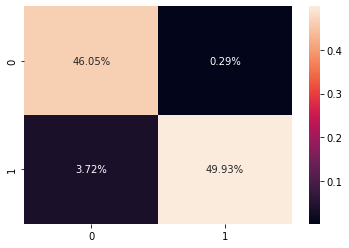

In [43]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)

## Train data ##
X_train_prediction = knn.predict(X_train)
train_acc_knn = accuracy_score(X_train_prediction,Y_train)
conmat_train_knn = confusion_matrix(X_train_prediction, Y_train)
print('Accuracy on training data : ',train_acc_knn)
print('Confusion matrix on training data : ',conmat_train_knn)

## Test data ##
X_test_prediction = knn.predict(X_test)
test_acc_knn = accuracy_score(X_test_prediction,Y_test)
conmat_test_knn = confusion_matrix(X_test_prediction,Y_test)
recall_knn = recall_score(X_test_prediction, Y_test)
precision_knn = precision_score(X_test_prediction, Y_test)
print('Accuracy on test data : ',test_acc_knn)
sns.heatmap(conmat_test_knn/np.sum(conmat_test_knn),annot = True,fmt='.2%')

### 3. Naive Bayes

Accuracy on training data :  0.8291719342604298
Confusion matrix on training data :  [[2807  718]
 [ 363 2440]]
Accuracy on test data :  0.8237463126843658


<AxesSubplot:>

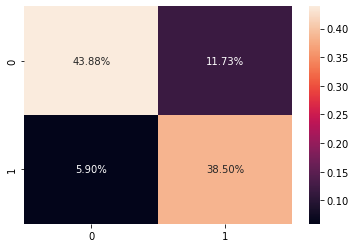

In [44]:
GNB = GaussianNB()
GNB.fit(X_train,Y_train)

## Train data ##
X_train_prediction = GNB.predict(X_train)
train_acc_gnb = accuracy_score(X_train_prediction,Y_train)
conmat_train_gnb = confusion_matrix(X_train_prediction, Y_train)
print('Accuracy on training data : ',train_acc_gnb)
print('Confusion matrix on training data : ',conmat_train_gnb)

## Test data ##
X_test_prediction = GNB.predict(X_test)
test_acc_gnb = accuracy_score(X_test_prediction,Y_test)
conmat_test_gnb = confusion_matrix(X_test_prediction,Y_test)
recall_gnb = recall_score(X_test_prediction, Y_test)
precision_gnb = precision_score(X_test_prediction, Y_test)
print('Accuracy on test data : ',test_acc_gnb)
sns.heatmap(conmat_test_gnb/np.sum(conmat_test_gnb),annot = True,fmt='.2%')

### Comparison b/w Models

In [46]:
Models = ['Logistic Regression','KNN','Gaussian NB']
train_accuracy = [train_acc_log,train_acc_knn,train_acc_gnb]
test_accuracy = [test_acc_log,test_acc_knn,test_acc_gnb]
recall_score = [recall_log,recall_knn,recall_gnb]
precision_score = [precision_log,precision_knn,precision_gnb]

score = {'Model': Models, 'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Recall Score':recall_score,'Precision Score':precision_score}
Models = pd.DataFrame(score)
Models

,Model,Train Accuracy,Test Accuracy,Recall Score,Precision Score
0,Logistic Regression,0.894753,0.895280,0.892857,0.899413
1,KNN,0.979614,0.959808,0.930584,0.994126
2,Gaussian NB,0.829172,0.823746,0.867110,0.766520
